# EDA of US Census and NY BOE Data
Focusing on NY's 23rd Congressional District

# Imports

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load US Census Data

Census Data from [data.census.gov](data.census.gov)

* Age and Sex Table 
    * American Community Survey (ACS)
    * TableID SO101
* Product 2019 ACS 1-Year Estimates

In [5]:
data_file = 'ACSST1Y2019.S0101_data_with_overlays_2021-01-03T131512.csv'

In [6]:
df = pd.read_csv(data_file)

In [7]:
df

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under ...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!5 to 9...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!10 to ...,Margin of Error!!Total!!Total population!!AGE!...,...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...
1,0100000US,United States,328239523,*****,19404835,22314,19690437,69224,21423479,69779,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,5001600US3623,"Congressional District 23 (116th Congress), Ne...",687583,3878,34759,1177,37179,1896,37528,1806,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


Cols of interest
* Total Population
* Population 18 years and over
* Male 18+
* Female 18+

In [15]:
cols_of_interest = ['NAME', 
                    'S0101_C01_001E', 
                    'S0101_C01_026E', 
                    'S0101_C03_001E', 
                    'S0101_C03_026E', 
                    'S0101_C05_001E', 
                    'S0101_C05_026E']

In [31]:
census_df = df[cols_of_interest]

In [32]:
census_df

,NAME,S0101_C01_001E,S0101_C01_026E,S0101_C03_001E,S0101_C03_026E,S0101_C05_001E,S0101_C05_026E
0,Geographic Area Name,Estimate!!Total!!Total population,Estimate!!Total!!Total population!!SELECTED AG...,Estimate!!Male!!Total population,Estimate!!Male!!Total population!!SELECTED AGE...,Estimate!!Female!!Total population,Estimate!!Female!!Total population!!SELECTED A...
1,United States,328239523,255271738,161588973,124267346,166650550,131004392
2,"Congressional District 23 (116th Congress), Ne...",687583,553107,341076,271310,346507,281797


In [33]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NAME            3 non-null      object
 1   S0101_C01_001E  3 non-null      object
 2   S0101_C01_026E  3 non-null      object
 3   S0101_C03_001E  3 non-null      object
 4   S0101_C03_026E  3 non-null      object
 5   S0101_C05_001E  3 non-null      object
 6   S0101_C05_026E  3 non-null      object
dtypes: object(7)
memory usage: 296.0+ bytes


# LOAD NY Board of Education (BOE) Data

Data from New York State BOE [link](https://www.elections.ny.gov/EnrollmentCD.html)

* Enrollment by Congressional District
    * As of 11/1/2020

## Load Data into Dataframe and Clean

In [64]:
boe_data_file = 'congress_nov20.xls'

In [65]:
boe_df = pd.read_excel(boe_data_file, sheet_name='CD Enrollment November 2020')

In [66]:
boe_df.head()

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Suffolk,Active,165334.0,167547.0,11593.0,1915.0,1035.0,951.0,22615.0,25.0,231.0,142236.0,513482.0
2,1.0,Suffolk,Inactive,14768.0,13653.0,1002.0,211.0,132.0,55.0,2359.0,0.0,20.0,12982.0,45182.0
3,1.0,Suffolk,Total,180102.0,181200.0,12595.0,2126.0,1167.0,1006.0,24974.0,25.0,251.0,155218.0,558664.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop all the rows that are all NaN

In [67]:
boe_df.dropna(how='all', inplace=True)

In [68]:
boe_df.head()

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
1,1.0,Suffolk,Active,165334.0,167547.0,11593.0,1915.0,1035.0,951.0,22615.0,25.0,231.0,142236.0,513482.0
2,1.0,Suffolk,Inactive,14768.0,13653.0,1002.0,211.0,132.0,55.0,2359.0,0.0,20.0,12982.0,45182.0
3,1.0,Suffolk,Total,180102.0,181200.0,12595.0,2126.0,1167.0,1006.0,24974.0,25.0,251.0,155218.0,558664.0
5,1.0,District Total,Active,165334.0,167547.0,11593.0,1915.0,1035.0,951.0,22615.0,25.0,231.0,142236.0,513482.0
6,1.0,District Total,InActive,14768.0,13653.0,1002.0,211.0,132.0,55.0,2359.0,0.0,20.0,12982.0,45182.0


In [48]:
# Counties in NY 23 Congressional District
counties_23 = ['Chautauqua', 'Cattaraugus', 'Allegany', 'Steuben', 'Ontario', 
               'Yates', 'Seneca', 'Schuyler', 'Tompkins', 'Chemung', 'Tioga']

# NOTE that Ontario and Tioga Counties are only partially in the 23rd
# Ontario is also in the 27th District
# Tioga is also in the 22nd District

The values in the COUNTY column have trailing spaces and they need to be removed to work with the data more easily

In [69]:
boe_df['COUNTY'] = boe_df['COUNTY'].str.strip()

In [72]:
boe_23_df = boe_df[boe_df['DISTRICT'] == 23.0]

In [74]:
boe_23_df

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
377,23.0,Allegany,Active,5681.0,13238.0,448.0,127.0,88.0,72.0,1243.0,1.0,11.0,5288.0,26197.0
378,23.0,Allegany,Inactive,333.0,517.0,24.0,8.0,8.0,6.0,76.0,0.0,3.0,391.0,1366.0
379,23.0,Allegany,Total,6014.0,13755.0,472.0,135.0,96.0,78.0,1319.0,1.0,14.0,5679.0,27563.0
381,23.0,Cattaraugus,Active,13799.0,18915.0,1119.0,224.0,122.0,134.0,2327.0,3.0,26.0,10067.0,46736.0
382,23.0,Cattaraugus,Inactive,835.0,990.0,68.0,25.0,14.0,5.0,143.0,0.0,6.0,840.0,2926.0
383,23.0,Cattaraugus,Total,14634.0,19905.0,1187.0,249.0,136.0,139.0,2470.0,3.0,32.0,10907.0,49662.0
385,23.0,Chautauqua,Active,25038.0,27595.0,1964.0,441.0,162.0,251.0,4614.0,1.0,63.0,19663.0,79792.0
386,23.0,Chautauqua,Inactive,1652.0,1430.0,109.0,33.0,25.0,21.0,333.0,0.0,8.0,1596.0,5207.0
387,23.0,Chautauqua,Total,26690.0,29025.0,2073.0,474.0,187.0,272.0,4947.0,1.0,71.0,21259.0,84999.0
389,23.0,Chemung,Active,15523.0,21207.0,832.0,232.0,118.0,203.0,2996.0,2.0,32.0,11276.0,52421.0


Filter the data for Active voters

In [75]:
boe_23_active_df = boe_23_df[boe_23_df['STATUS'] == 'Active']

In [76]:
boe_23_active_df

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
377,23.0,Allegany,Active,5681.0,13238.0,448.0,127.0,88.0,72.0,1243.0,1.0,11.0,5288.0,26197.0
381,23.0,Cattaraugus,Active,13799.0,18915.0,1119.0,224.0,122.0,134.0,2327.0,3.0,26.0,10067.0,46736.0
385,23.0,Chautauqua,Active,25038.0,27595.0,1964.0,441.0,162.0,251.0,4614.0,1.0,63.0,19663.0,79792.0
389,23.0,Chemung,Active,15523.0,21207.0,832.0,232.0,118.0,203.0,2996.0,2.0,32.0,11276.0,52421.0
393,23.0,Ontario,Active,8780.0,9617.0,548.0,102.0,91.0,101.0,1378.0,0.0,24.0,6973.0,27614.0
397,23.0,Schuyler,Active,3502.0,5038.0,245.0,59.0,59.0,44.0,715.0,3.0,4.0,2828.0,12497.0
401,23.0,Seneca,Active,6237.0,7882.0,441.0,107.0,75.0,72.0,1053.0,1.0,14.0,4514.0,20396.0
405,23.0,Steuben,Active,14376.0,29535.0,996.0,216.0,173.0,182.0,2921.0,1.0,39.0,11663.0,60102.0
409,23.0,Tioga,Active,6416.0,10850.0,367.0,82.0,73.0,116.0,1329.0,0.0,6.0,5397.0,24636.0
413,23.0,Tompkins,Active,32194.0,11087.0,392.0,194.0,319.0,152.0,2134.0,6.0,25.0,12133.0,58636.0


## What counties have more registered Dems vs. Reps

In [89]:
boe_23_active_df[boe_23_active_df['DEM'] > boe_23_active_df['REP']]

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
413,23.0,Tompkins,Active,32194.0,11087.0,392.0,194.0,319.0,152.0,2134.0,6.0,25.0,12133.0,58636.0


Tompkins Country is the only county in the 23rd that has more active Democrats than Republicans

## What counties have more registered Reps vs. Dems

In [142]:
boe_23_active_df[boe_23_active_df['REP'] > boe_23_active_df['DEM']]

,DISTRICT,COUNTY,STATUS,DEM,REP,CON,WOR,GRE,LBT,IND,SAM,OTH,BLANK,TOTAL
377,23.0,Allegany,Active,5681.0,13238.0,448.0,127.0,88.0,72.0,1243.0,1.0,11.0,5288.0,26197.0
381,23.0,Cattaraugus,Active,13799.0,18915.0,1119.0,224.0,122.0,134.0,2327.0,3.0,26.0,10067.0,46736.0
385,23.0,Chautauqua,Active,25038.0,27595.0,1964.0,441.0,162.0,251.0,4614.0,1.0,63.0,19663.0,79792.0
389,23.0,Chemung,Active,15523.0,21207.0,832.0,232.0,118.0,203.0,2996.0,2.0,32.0,11276.0,52421.0
393,23.0,Ontario,Active,8780.0,9617.0,548.0,102.0,91.0,101.0,1378.0,0.0,24.0,6973.0,27614.0
397,23.0,Schuyler,Active,3502.0,5038.0,245.0,59.0,59.0,44.0,715.0,3.0,4.0,2828.0,12497.0
401,23.0,Seneca,Active,6237.0,7882.0,441.0,107.0,75.0,72.0,1053.0,1.0,14.0,4514.0,20396.0
405,23.0,Steuben,Active,14376.0,29535.0,996.0,216.0,173.0,182.0,2921.0,1.0,39.0,11663.0,60102.0
409,23.0,Tioga,Active,6416.0,10850.0,367.0,82.0,73.0,116.0,1329.0,0.0,6.0,5397.0,24636.0
417,23.0,Yates,Active,3307.0,6463.0,235.0,52.0,46.0,44.0,682.0,0.0,28.0,2899.0,13756.0


This is all the counties except Tompkins, plus the total for the district

## How do the total number of Democrats and Republicans compare with the total?

In [110]:
total_dem = boe_23_active_df[boe_23_active_df['COUNTY'] == 'District Total']['DEM'].values[0]
total_rep = boe_23_active_df[boe_23_active_df['COUNTY'] == 'District Total']['REP'].values[0]
total_active = boe_23_active_df[boe_23_active_df['COUNTY'] == 'District Total']['TOTAL'].values[0]

In [113]:
total_ind_3rd = total_active - total_dem - total_rep

In [111]:
print(f'The percentage of active Democratic voters in the 23rd is {round(total_dem / total_active, 2)}')

The percentage of active Democratic voters in the 23rd is 0.32


In [112]:
print(f'The percentage of active Replican voters in the 23rd is {round(total_rep / total_active, 2)}')

The percentage of active Replican voters in the 23rd is 0.38


In [114]:
print(f'The percentage of active Independend or 3rd Party voters in the 23rd is {round(total_ind_3rd / total_active, 2)}')

The percentage of active Independend or 3rd Party voters in the 23rd is 0.3


## Visualize the Party breakdown by County

In [77]:
parties = ['DEM', 'REP', 'CON', 'WOR', 'GRE', 'LBT', 'IND', 'SAM', 'OTH', 'BLANK']

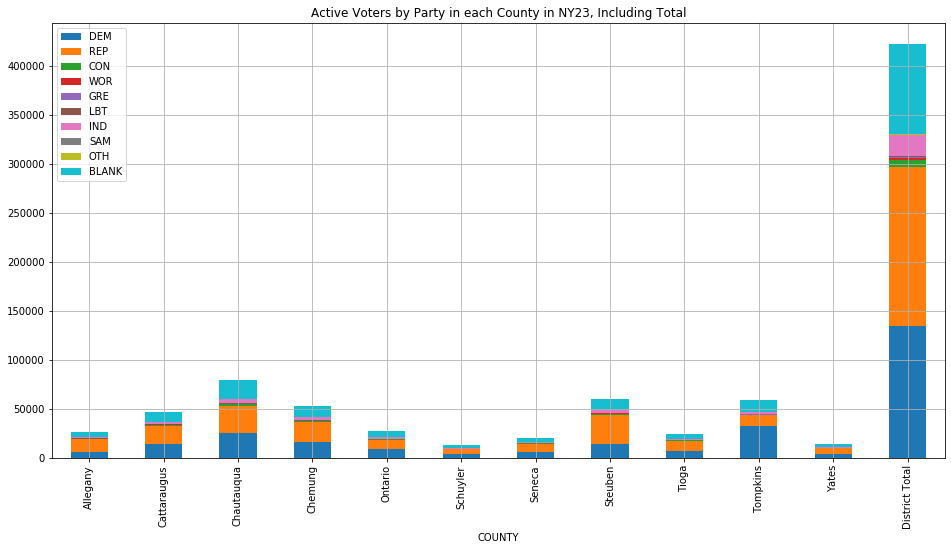

In [141]:
boe_23_active_df.plot.bar(x='COUNTY', 
                          y=parties, 
                          stacked=True, 
                          figsize=(16, 8), 
                          title='Active Voters by Party in each County in NY23, Including Total', 
                          grid=True)

Plot the same data without the District Total

*The District Total is the last row in the dataframe*

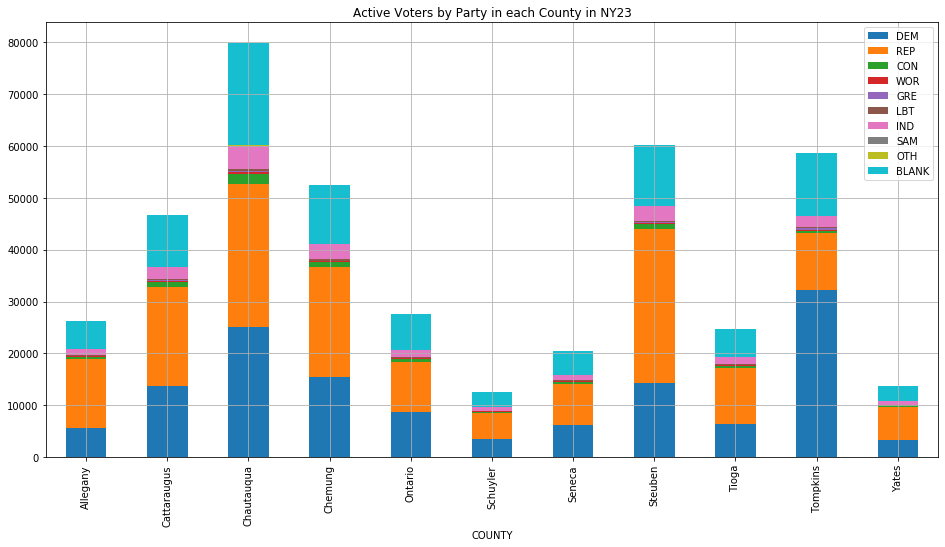

In [118]:
boe_23_active_df.iloc[:-1].plot.bar(x='COUNTY', 
                          y=parties, 
                          stacked=True, 
                          figsize=(16, 8), 
                          title='Active Voters by Party in each County in NY23', 
                          grid=True)

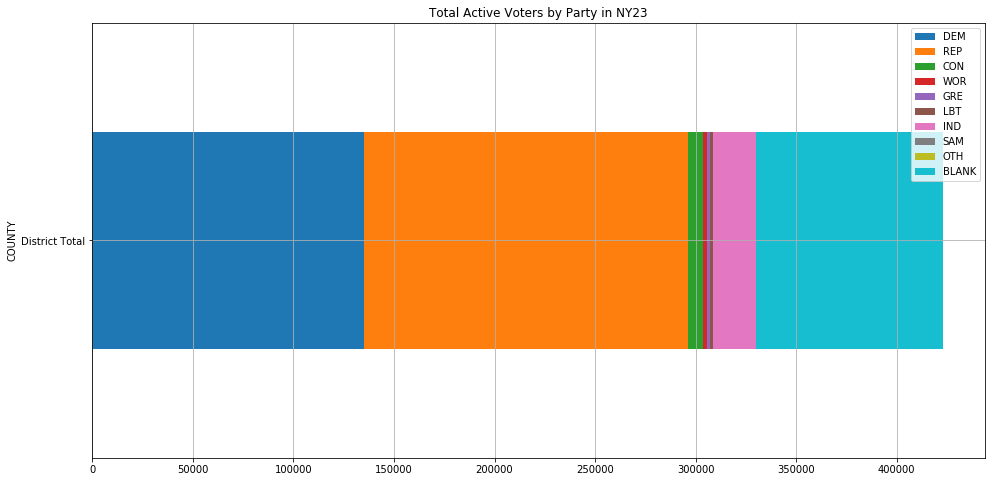

In [140]:
boe_23_active_df.iloc[-1:].plot.barh(x='COUNTY', 
                                     y=parties,
                                     stacked=True, 
                                     figsize=(16, 8), 
                                     title='Total Active Voters by Party in NY23', 
                                     grid=True)